# Import datas

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits['data']
Y = digits['target']

X.shape, Y.shape

((1797, 64), (1797,))

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((898, 64), (899, 64), (898,), (899,))

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(8,8))
plt.show()

<Figure size 640x480 with 1 Axes>

# Define model

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_shape=(64,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)  

# Train model

In [5]:
model.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          epochs=500,
          batch_size=128,
          verbose=0
         )

Instructions for updating:
Use tf.cast instead.


# Results

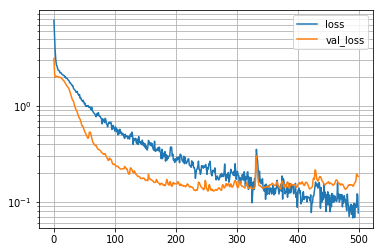

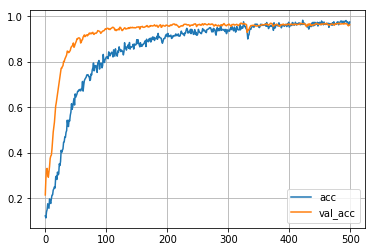

In [6]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.yscale('log')
plt.grid(which='both')
plt.show()

plt.plot(model.history.history['acc'], label='acc')
plt.plot(model.history.history['val_acc'], label='val_acc')
plt.legend()
#plt.yscale('log')
plt.grid(which='both')
plt.show()

In [7]:
pred = model.predict(X_test)

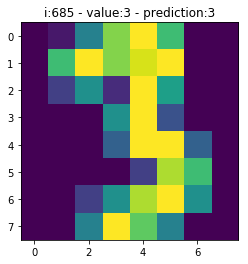

In [8]:
import numpy as np

i = np.random.choice(range(len(X_test)))
plt.imshow(X_test[i].reshape(8,8))
plt.title('i:{} - value:{} - prediction:{}'.format(i, Y_test[i], np.argmax(pred[i])))
plt.show()

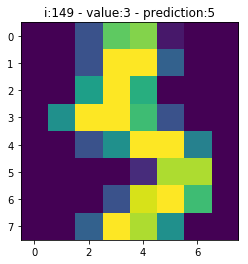

In [9]:
bad_classif = np.where(Y_test!=np.argmax(pred, axis=1))[0]

i = np.random.choice(bad_classif)
plt.imshow(X_test[i].reshape(8,8))
plt.title('i:{} - value:{} - prediction:{}'.format(i, Y_test[i], np.argmax(pred[i])))
plt.show()